In [234]:
# Numerical arrays.
import numpy as np

# Dataframes.
import pandas as pd

# Plots.
import matplotlib.pyplot as plt

# More aesthetic plots.
import seaborn as sns

# Statistics.
import scipy.stats as ss

# Set default plot size.
plt.rcParams['figure.figsize'] = (12, 8)

# Set default plot style.
plt.style.use("ggplot")

In [235]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [237]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [238]:
# Check null values.
df.isnull().count()

patient      120
sex          120
agegrp       120
bp_before    120
bp_after     120
dtype: int64

The count above tells us that there are no null values in the data set.

In [239]:
# Blood pressure mean before medication.
df["bp_before"].mean()

156.45

In [240]:
# Blood pressure mean after medication.
df["bp_after"].mean()

151.35833333333332

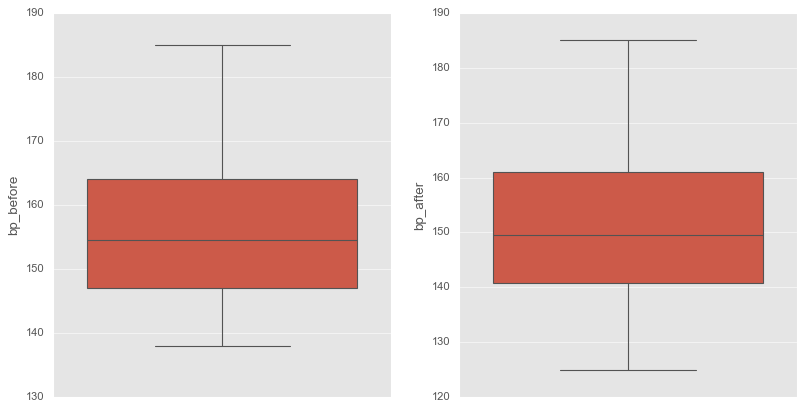

In [241]:
plt.rcParams['figure.figsize'] = (12, 6)
fig, ax = plt.subplots(1, 2)

sns.set_style("darkgrid")
sns.boxplot(ax=ax[0], data=df, y=df["bp_before"])
sns.boxplot(ax=ax[1], data=df, y=df["bp_after"]);

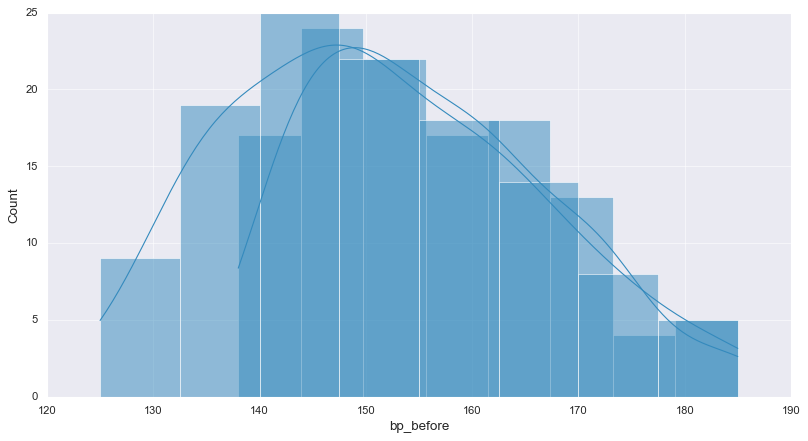

In [242]:
fig, ax = plt.subplots()

sns.histplot(x=df["bp_before"], kde=True)
sns.histplot(x=df["bp_after"], kde=True);

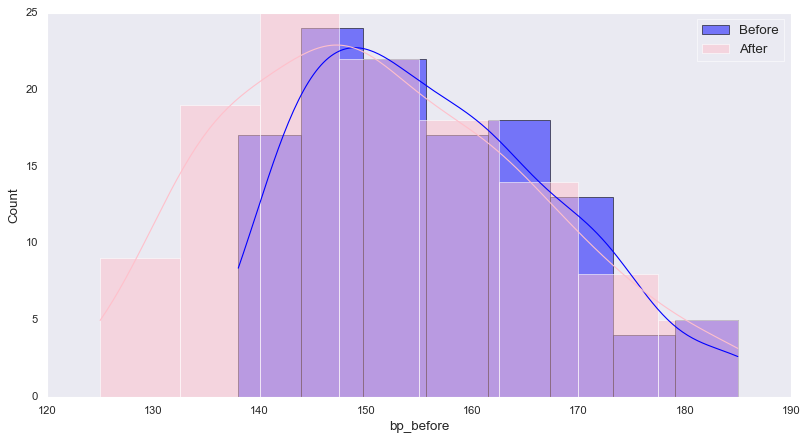

In [262]:
sns.histplot(x=df["bp_before"], kde=True, color="blue", edgecolor="black", label="Before")
sns.histplot(x=df["bp_after"], kde=True, color="pink", label="After")
plt.legend();


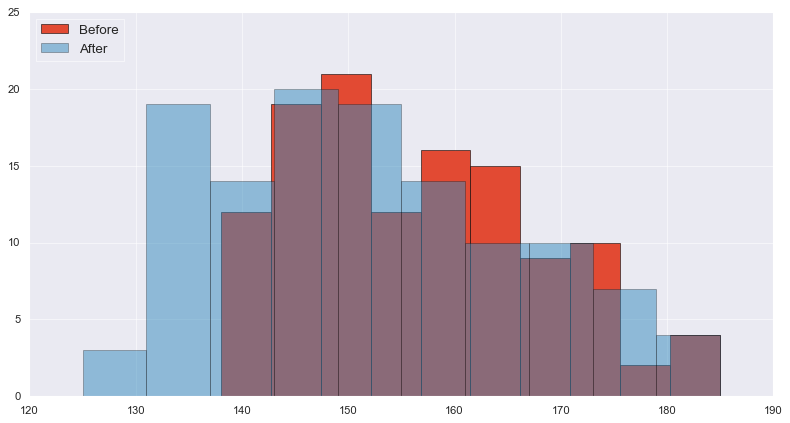

In [245]:
fig, ax = plt.subplots()
sns.set_style("dark")

ax.hist(df["bp_before"], alpha=1, edgecolor="black", label="Before")
ax.hist(df["bp_after"], alpha=0.5, edgecolor="black", label="After")
plt.legend(loc="upper left");

## T test with scipy.stats
[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
***

([Recommended read by Ian](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php))

#### Function & parameters:
`scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)`

In [ ]:
t_ss, p_ss = ss.ttest_ind(a, b)

In [61]:
stats.ttest_ind(df['bp_after'][df['sex'] == 'Male'],
                df['bp_after'][df['sex'] == 'Female'])

Ttest_indResult(statistic=3.3479506182111387, pvalue=0.0010930222986154283)